# **Setup and Library Imports**

### **Installing Required Packages**

In [8]:
! pip install --quiet transformers
! pip install --quiet torch
! pip install --quiet datasets
! pip install --quiet scikit-learn
! pip install --quiet matplotlib
! pip install --quiet ipywidgets
! pip install --quiet seaborn

### **Importing Libraries**

In [9]:
# Hugging Face libraries for training and transformer models
from transformers import pipeline

# Evaluation metrics and utilities
from sklearn.metrics import confusion_matrix, classification_report

# Loading datasets for training and evaluation
from datasets import load_dataset

# Data manipulation and display utilities
import pandas as pd
from tabulate import tabulate
from collections import Counter

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


### **Logging into Hugging Face Hub**

In [10]:
from huggingface_hub import notebook_login

# Execute the login function to access the Hugging Face account
# notebook_login()

### **Defining Model and Dataset Paths**

In [11]:
model_path = "SodaXII/old_vit-base-patch16-224_rice-disease-01_11172024"
dataset_path = "cvmil/rice-disease-01"

### **Load Dataset and Extract Labels**

Load the dataset from huggingface and extract the class labels from the training data.

In [12]:
# Load the dataset
dataset = load_dataset(dataset_path, split='test')

# Extract class labels from the training set
labels = dataset.features['label'].names

In [13]:
label_mapping = dataset.features['label'].int2str

# Count the number of samples per class in each split
train_counts = Counter(dataset['label'])

# Create a DataFrame for the class distribution
data = {
    'ID': list(range(len(labels))),
    'Label': labels,
    'Training': [train_counts[i] if i in train_counts else 0 for i in range(len(labels))],
}

# Display the class distribution in a table format
df = pd.DataFrame(data)
print(tabulate(df, headers='keys', tablefmt='grid', showindex=False))

+------+------------------------+------------+
|   ID | Label                  |   Training |
+======+========================+============+
|    0 | bacterial_leaf_blight  |        166 |
+------+------------------------+------------+
|    1 | brown_spot             |        221 |
+------+------------------------+------------+
|    2 | healthy                |        150 |
+------+------------------------+------------+
|    3 | leaf_blast             |        250 |
+------+------------------------+------------+
|    4 | leaf_scald             |        187 |
+------+------------------------+------------+
|    5 | narrow_brown_leaf_spot |        128 |
+------+------------------------+------------+
|    6 | rice_hispa             |        173 |
+------+------------------------+------------+
|    7 | sheath_blight          |        203 |
+------+------------------------+------------+


# **Model**

### **Initialize Image Classification Pipeline**

This section initializes the image classification pipeline using a pre-trained model for classification tasks.

In [14]:
# Initialize image classification pipeline with the pre-trained model
classifier = pipeline("image-classification", model=model_path)

config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/325 [00:00<?, ?B/s]

### **Model Evaluation on Dataset**

This section evaluates the model on the dataset by running inference on each image and comparing the predicted label with the actual label.

In [15]:
# Initialize lists to store predictions and actual labels
all_preds = []
all_labels = []

# Evaluate the model on the dataset
for example in dataset:
    # Run inference
    image = example['image']
    result = classifier(image)

    # Get the predicted label (the one with the highest score)
    predicted_label = result[0]['label']
    all_preds.append(labels.index(predicted_label))  # Convert label to index
    all_labels.append(example['label'])  # Store actual label

### **Evaluation Metrics and Confusion Matrix**

This section computes and displays the confusion matrix and classification report, providing insights into the model's performance on the dataset.

Classification Report:
                        precision    recall  f1-score   support

 bacterial_leaf_blight       0.50      0.39      0.44       166
            brown_spot       0.53      0.57      0.55       221
               healthy       0.69      0.73      0.71       150
            leaf_blast       0.47      0.56      0.51       250
            leaf_scald       0.52      0.29      0.37       187
narrow_brown_leaf_spot       0.30      0.02      0.04       128
            rice_hispa       0.77      0.42      0.54       173
         sheath_blight       0.39      0.85      0.53       203

              accuracy                           0.50      1478
             macro avg       0.52      0.48      0.46      1478
          weighted avg       0.52      0.50      0.48      1478



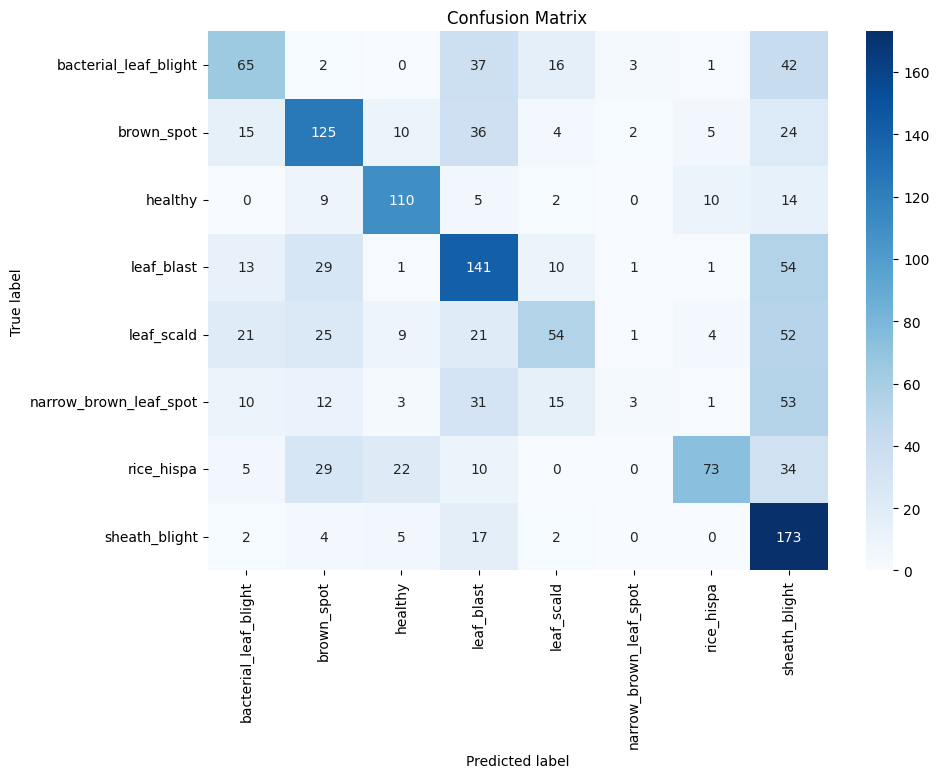

In [16]:
# Compute confusion matrix and classification report
cm = confusion_matrix(all_labels, all_preds)
report = classification_report(all_labels, all_preds, target_names=labels)

# Print classification report
print("Classification Report:")
print(report)

# Display confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, 
            yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()
